In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.externals import joblib

In [2]:
mldf_val=pd.DataFrame(pd.read_csv('./Data/X_yMLval.csv'))

In [3]:
mldf_val.isnull().sum()

0              0
1              0
2              0
3              0
4              0
5              0
6              0
7              0
8              0
9              0
10             0
11             0
12             0
13             0
14             0
15             0
16             0
attack_code    0
dtype: int64

In [4]:
Y=mldf_val['attack_code']
X=mldf_val.drop(columns=['attack_code'])

In [5]:
def create_confusion(y, pred):
    cm=confusion_matrix(y,pred)
    return pd.DataFrame(cm, columns=['PredictedNO', 'PredictedYES'], index=['ActualNO', 'ActualYES'])


In [6]:
lrl2= joblib.load('lrl2.pkl') 

In [7]:
predict1=lrl2.predict(X)

In [8]:
create_confusion(Y, predict1)

,PredictedNO,PredictedYES
ActualNO,35343,25250
ActualYES,18631,211224


In [18]:
def corr_plot(df):
    # Set the default matplotlib figure size to 7x7:
    fix, ax = plt.subplots(figsize=(8,6))

   
    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(df, ax=ax, annot=True,  cmap="YlGnBu")

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

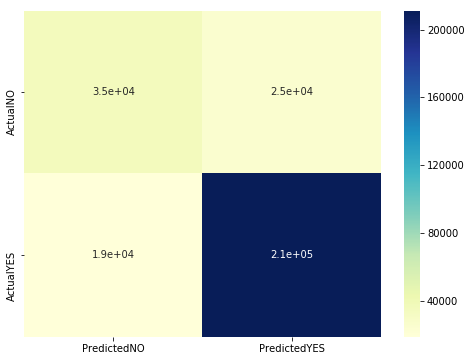

In [19]:
corr_plot(create_confusion(Y, predict1))

In [22]:
print(classification_report(Y,predict1))

             precision    recall  f1-score   support

          0       0.65      0.58      0.62     60593
          1       0.89      0.92      0.91    229855

avg / total       0.84      0.85      0.85    290448



In [24]:
Y_lr = pd.DataFrame(lrl2.predict_proba(X), columns=['class_0_pp','class_1_pp'])
roc_result = roc_curve(Y, Y_lr.class_1_pp)
results = pd.DataFrame()
results['FPR'] = roc_result[0]
results['TPR'] = roc_result[1]
results['Threshold'] = roc_result[2]
# get the results from the roc_curve
fprlr, tprlr, _ = roc_curve(Y, Y_lr.class_1_pp)

#use fpr and tpr to calculate the AUC
roc_auclr = auc(fprlr, tprlr)

roc_auclr

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


0.9193881546466411

In [25]:
rf= joblib.load('rf.pkl') 

In [26]:
predict2=rf.predict(X)

In [27]:
create_confusion(Y, predict2)

,PredictedNO,PredictedYES
ActualNO,59686,907
ActualYES,7973,221882


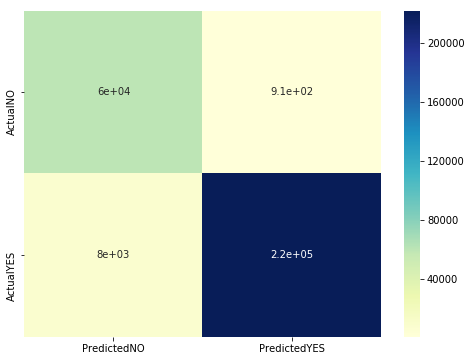

In [28]:
corr_plot(create_confusion(Y, predict2))

In [29]:
print(classification_report(Y,predict2))

             precision    recall  f1-score   support

          0       0.88      0.99      0.93     60593
          1       1.00      0.97      0.98    229855

avg / total       0.97      0.97      0.97    290448



In [30]:
Y_rf = pd.DataFrame(rf.predict_proba(X), columns=['class_0_pp','class_1_pp'])
roc_result = roc_curve(Y, Y_rf.class_1_pp)
results = pd.DataFrame()
results['FPR'] = roc_result[0]
results['TPR'] = roc_result[1]
results['Threshold'] = roc_result[2]
# get the results from the roc_curve
fprrf, tprrf, _ = roc_curve(Y, Y_rf.class_1_pp)

#use fpr and tpr to calculate the AUC
roc_auc = auc(fprrf, tprrf)
# get the results from the roc_curve
fprrf, tprlr, _ = roc_curve(Y, Y_rf.class_1_pp)

#use fpr and tpr to calculate the AUC
roc_aucrf = auc(fprrf, tprrf)
roc_aucrf

0.9851994478893864

In [31]:
xgb= joblib.load('XGBmodel.pkl') 


In [32]:
predict3=xgb.predict(X)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [33]:
create_confusion(Y, predict3)

,PredictedNO,PredictedYES
ActualNO,55073,5520
ActualYES,7305,222550


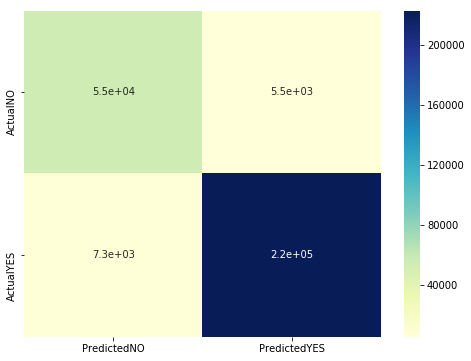

In [34]:
corr_plot(create_confusion(Y, predict3))

In [27]:
print(classification_report(Y,predict3))

             precision    recall  f1-score   support

          0       0.88      0.91      0.90     60593
          1       0.98      0.97      0.97    229855

avg / total       0.96      0.96      0.96    290448



In [37]:
Y_xgb = pd.DataFrame(xgb.predict_proba(X), columns=['class_0_pp','class_1_pp'])
roc_result = roc_curve(Y, Y_xgb.class_1_pp)
results = pd.DataFrame()
results['FPR'] = roc_result[0]
results['TPR'] = roc_result[1]
results['Threshold'] = roc_result[2]
# get the results from the roc_curve
fprxgb, tprxgb, _ = roc_curve(Y, Y_xgb.class_1_pp)

#use fpr and tpr to calculate the AUC
roc_aucxgb = auc(fprxgb, tprxgb)

roc_aucxgb

0.9903739490040349

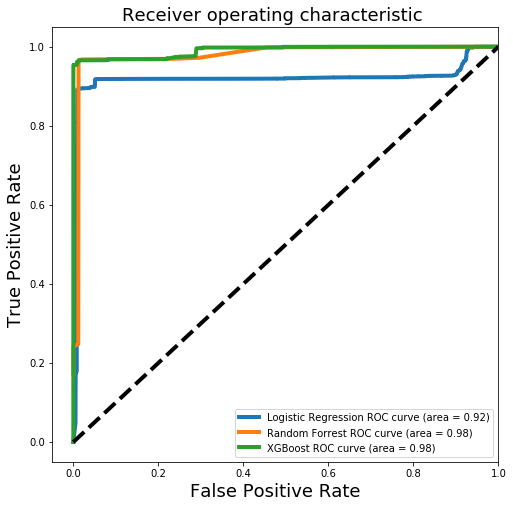

In [50]:
# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])
plt.plot(fprlr, tprlr, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot(fprrf, tprrf, label='Random Forrest ROC curve (area = %0.2f)' % roc_aucrf, linewidth=4)
plt.plot(fprxgb, tprxgb, label='XGBoost ROC curve (area = %0.2f)' % roc_aucrf, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic ', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## Summary of Machine Learning
With zero increase in false positive XGBoost true positive increased to 0.95 then with approximately 0.01 increase in  false positive the true positive increased by 0.01. After gaining   0.3 false positive our XGBoost model was able to detect all  malicious connections. We can say threshold for detecting  all malicious connection is at least 0.7 probability for XGBoost prediction

With zero increase in false positive Random Forest true positive increased to 0.25 then with slight increase in false positive  the true positive increased to 0.96. After gaining 0.3  false positive our Random Forest model was able to gradually  detect all malicious connections at around 0.5. We can say threshold for  detecting all malicious connection is at least 0.5 probability

With zero increase in false positive Logistic Regression true positive increased to 0.9 then with slight increase in false positive around 0.05 the true positive increased to around 0.91. Beyond this true positive  remain constant. We can say threshold for detecting 0.92 true positive  Logistic Regression has at least 0.9 probability. 